In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [5]:
df=pd.read_csv('carprediction.csv')

In [6]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [7]:
df.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [9]:
df.dropna()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
545,23,compact car,27,4.0,2.0,awd,gas,33,bmw,430i xdrive gran coupe,a,2024
546,21,midsize car,24,6.0,3.0,rwd,gas,29,bmw,840i gran coupe,a,2024
547,21,midsize car,24,6.0,3.0,awd,gas,29,bmw,840i xdrive gran coupe,a,2024
548,17,midsize car,19,8.0,4.4,awd,gas,24,bmw,m850i xdrive gran coupe,a,2024


In [10]:
missing_columns = df.isnull().sum()[df.isnull().sum() > 0]
print("Columns with missing values:\n", missing_columns)


Columns with missing values:
 cylinders       2
displacement    2
dtype: int64


In [11]:
print(df['cylinders'].describe())  # For numerical columns



count    548.000000
mean       5.315693
std        1.759999
min        3.000000
25%        4.000000
50%        4.000000
75%        6.000000
max       12.000000
Name: cylinders, dtype: float64


In [12]:
print(df['displacement'])

0      2.5
1      2.5
2      2.5
3      2.0
4      2.0
      ... 
545    2.0
546    3.0
547    3.0
548    4.4
549    4.4
Name: displacement, Length: 550, dtype: float64


In [13]:
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mean())  # Mean
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median())  # Median
df['cylinders'] = df['cylinders'].fillna(0)  # Fixed value


In [14]:
df['displacement'] = df['displacement'].fillna(df['displacement'].mean())  # Mean
df['displacement'] = df['displacement'].fillna(df['displacement'].median())  # Median
df['displacement'] = df['displacement'].fillna(0)  # Fixed value


In [15]:
df.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [16]:
print(df.dtypes)

city_mpg             int64
class               object
combination_mpg      int64
cylinders          float64
displacement       float64
drive               object
fuel_type           object
highway_mpg          int64
make                object
model               object
transmission        object
year                 int64
dtype: object


In [17]:
print(df.select_dtypes(include=['object']).head())


                         class drive fuel_type   make     model transmission
0                  midsize car   fwd       gas  mazda         6            m
1                  midsize car   fwd       gas  mazda         6            a
2  small sport utility vehicle   fwd       gas  mazda  cx-5 2wd            a
3  small sport utility vehicle   fwd       gas  mazda  cx-5 2wd            m
4  small sport utility vehicle   fwd       gas  mazda  cx-5 2wd            a


In [18]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [19]:


print(df.columns)


Index(['city_mpg', 'class', 'combination_mpg', 'cylinders', 'displacement',
       'drive', 'fuel_type', 'highway_mpg', 'make', 'model', 'transmission',
       'year'],
      dtype='object')


In [20]:
for col in df.columns:
    print(f"'{col}'")


'city_mpg'
'class'
'combination_mpg'
'cylinders'
'displacement'
'drive'
'fuel_type'
'highway_mpg'
'make'
'model'
'transmission'
'year'


In [21]:

print(df['class'].unique())


['midsize car' 'small sport utility vehicle' 'subcompact car' 'large car'
 'two seater' 'minicompact car' 'standard sport utility vehicle'
 'compact car' 'small station wagon' 'standard pickup truck' 'minivan'
 'small pickup truck' 'midsize station wagon']


In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the 'class' column
df['class'] = le.fit_transform(df['class'])

# Check the result
print(df['class'].head())  # Display the first few rows of the 'class' column after encoding


0    2
1    2
2    7
3    7
4    7
Name: class, dtype: int32


In [23]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,2,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,2,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,7,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,7,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,7,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the 'fuel_type' column
df['fuel_type'] = le.fit_transform(df['fuel_type'])

# Check the result
print(df['fuel_type'].head())  # Display the first few rows of the 'fuel_type' column after encoding


0    2
1    2
2    2
3    2
4    2
Name: fuel_type, dtype: int32


In [25]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,2,29,4.0,2.5,fwd,2,36,mazda,6,m,2014
1,26,2,30,4.0,2.5,fwd,2,37,mazda,6,a,2014
2,25,7,27,4.0,2.5,fwd,2,31,mazda,cx-5 2wd,a,2014
3,26,7,29,4.0,2.0,fwd,2,34,mazda,cx-5 2wd,m,2014
4,26,7,28,4.0,2.0,fwd,2,32,mazda,cx-5 2wd,a,2014


In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the 'fuel_type' column
df['drive'] = le.fit_transform(df['drive'])

# Check the result
print(df['drive'].head())  # Display the first few rows of the 'fuel_type' column after encoding


0    2
1    2
2    2
3    2
4    2
Name: drive, dtype: int32


In [27]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,2,29,4.0,2.5,2,2,36,mazda,6,m,2014
1,26,2,30,4.0,2.5,2,2,37,mazda,6,a,2014
2,25,7,27,4.0,2.5,2,2,31,mazda,cx-5 2wd,a,2014
3,26,7,29,4.0,2.0,2,2,34,mazda,cx-5 2wd,m,2014
4,26,7,28,4.0,2.0,2,2,32,mazda,cx-5 2wd,a,2014


In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the column with more than 500 categories
df['make'] = le.fit_transform(df['make'])

# Check the result
print(df.head())  # Display the first few rows of the encoded column


   city_mpg  class  combination_mpg  cylinders  displacement  drive  \
0        25      2               29        4.0           2.5      2   
1        26      2               30        4.0           2.5      2   
2        25      7               27        4.0           2.5      2   
3        26      7               29        4.0           2.0      2   
4        26      7               28        4.0           2.0      2   

   fuel_type  highway_mpg  make     model transmission  year  
0          2           36    19         6            m  2014  
1          2           37    19         6            a  2014  
2          2           31    19  cx-5 2wd            a  2014  
3          2           34    19  cx-5 2wd            m  2014  
4          2           32    19  cx-5 2wd            a  2014  


In [29]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,2,29,4.0,2.5,2,2,36,19,6,m,2014
1,26,2,30,4.0,2.5,2,2,37,19,6,a,2014
2,25,7,27,4.0,2.5,2,2,31,19,cx-5 2wd,a,2014
3,26,7,29,4.0,2.0,2,2,34,19,cx-5 2wd,m,2014
4,26,7,28,4.0,2.0,2,2,32,19,cx-5 2wd,a,2014


In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the column with more than 500 categories
df['model'] = le.fit_transform(df['model'])

# Check the result
print(df.head())  # Display the first few rows of the encoded column


   city_mpg  class  combination_mpg  cylinders  displacement  drive  \
0        25      2               29        4.0           2.5      2   
1        26      2               30        4.0           2.5      2   
2        25      7               27        4.0           2.5      2   
3        26      7               29        4.0           2.0      2   
4        26      7               28        4.0           2.0      2   

   fuel_type  highway_mpg  make  model transmission  year  
0          2           36    19     15            m  2014  
1          2           37    19     15            a  2014  
2          2           31    19     74            a  2014  
3          2           34    19     74            m  2014  
4          2           32    19     74            a  2014  


In [31]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,2,29,4.0,2.5,2,2,36,19,15,m,2014
1,26,2,30,4.0,2.5,2,2,37,19,15,a,2014
2,25,7,27,4.0,2.5,2,2,31,19,74,a,2014
3,26,7,29,4.0,2.0,2,2,34,19,74,m,2014
4,26,7,28,4.0,2.0,2,2,32,19,74,a,2014


In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the column with characters
df['transmission'] = le.fit_transform(df['transmission'])

# Check the result
print(df.head())  # Display the first few rows of the DataFrame


   city_mpg  class  combination_mpg  cylinders  displacement  drive  \
0        25      2               29        4.0           2.5      2   
1        26      2               30        4.0           2.5      2   
2        25      7               27        4.0           2.5      2   
3        26      7               29        4.0           2.0      2   
4        26      7               28        4.0           2.0      2   

   fuel_type  highway_mpg  make  model  transmission  year  
0          2           36    19     15             1  2014  
1          2           37    19     15             0  2014  
2          2           31    19     74             0  2014  
3          2           34    19     74             1  2014  
4          2           32    19     74             0  2014  


In [33]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,2,29,4.0,2.5,2,2,36,19,15,1,2014
1,26,2,30,4.0,2.5,2,2,37,19,15,0,2014
2,25,7,27,4.0,2.5,2,2,31,19,74,0,2014
3,26,7,29,4.0,2.0,2,2,34,19,74,1,2014
4,26,7,28,4.0,2.0,2,2,32,19,74,0,2014


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    int32  
 2   combination_mpg  550 non-null    int64  
 3   cylinders        550 non-null    float64
 4   displacement     550 non-null    float64
 5   drive            550 non-null    int32  
 6   fuel_type        550 non-null    int32  
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    int32  
 9   model            550 non-null    int32  
 10  transmission     550 non-null    int32  
 11  year             550 non-null    int64  
dtypes: float64(2), int32(6), int64(4)
memory usage: 38.8 KB


In [35]:
# Check for missing values in the DataFrame
print(df.isnull().sum())


city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


In [36]:
# Summary of your data
print(df.describe())  # Get summary statistics for numerical columns
print(df.info())      # Get data types and count of non-null entries for each column


         city_mpg       class  combination_mpg   cylinders  displacement  \
count  550.000000  550.000000       550.000000  550.000000    550.000000   
mean    21.460000    6.625455        24.069091    5.315693      2.931752   
std      8.147392    4.153881         7.478369    1.756790      1.246143   
min     11.000000    0.000000        14.000000    3.000000      1.200000   
25%     17.000000    2.000000        20.000000    4.000000      2.000000   
50%     20.000000    7.000000        23.000000    4.000000      2.500000   
75%     24.000000   11.000000        27.000000    6.000000      3.500000   
max    126.000000   12.000000       112.000000   12.000000      6.800000   

            drive   fuel_type  highway_mpg        make       model  \
count  550.000000  550.000000   550.000000  550.000000  550.000000   
mean     1.665455    1.989091    28.609091   13.427273  135.563636   
std      0.891616    0.134520     6.832228    7.277556   75.888295   
min      0.000000    0.000000    18

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['city_mpg', 'class', 'combination_mpg','cylinders','highway_mpg','make','model','transmission']] = scaler.fit_transform(df[['city_mpg', 'class', 'combination_mpg','cylinders','highway_mpg','make','model','transmission']])


In [38]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,0.434890,-1.11454,0.659956,-0.749601,2.5,2,2,1.082756,0.766439,-1.590145,2.372026,2014
1,0.557741,-1.11454,0.793797,-0.749601,2.5,2,2,1.229255,0.766439,-1.590145,-0.421581,2014
2,0.434890,0.09025,0.392275,-0.749601,2.5,2,2,0.350264,0.766439,-0.811979,-0.421581,2014
3,0.557741,0.09025,0.659956,-0.749601,2.0,2,2,0.789759,0.766439,-0.811979,2.372026,2014
4,0.557741,0.09025,0.526116,-0.749601,2.0,2,2,0.496763,0.766439,-0.811979,-0.421581,2014


In [39]:
X = df.drop('combination_mpg', axis=1)  # Features (all columns except target)
y = df['combination_mpg']  # Target (column to predict)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')


Mean Squared Error: 0.002947051244650168
R-Squared: 0.9936875873624693


In [43]:
print(model.coef_)


[ 0.6679114  -0.005123   -0.00998188 -0.0193853   0.00163773  0.00233996
  0.32499533  0.00354472  0.00531752 -0.00421403 -0.0028751 ]


In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-scores.mean()}')



Cross-Validation MSE: 0.0027377932116904487


In [45]:
import joblib
joblib.dump(model, 'car_fuel_prediction_model.pkl')


['car_fuel_prediction_model.pkl']

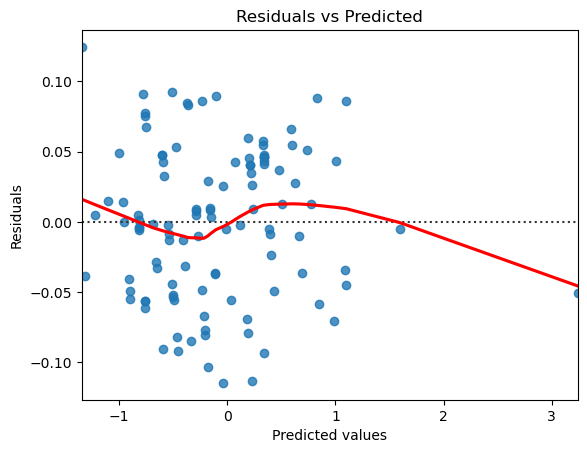

Mean Squared Error: 0.002947051244650168
R-squared: 0.9936875873624693


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot to check errors
y_pred = model.predict(X_test)  # assuming you have X_test and y_test

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

# Evaluate MSE and R-squared again
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


In [52]:
import pickle

# Saving the model
with open('car_fuel_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [53]:
# Assuming you have test data (X_test, y_test)
y_pred_new = model.predict(X_test)

# Evaluate predictions on the test set
from sklearn.metrics import mean_squared_error, r2_score
print("MSE on test set:", mean_squared_error(y_test, y_pred_new))
print("R-squared on test set:", r2_score(y_test, y_pred_new))


MSE on test set: 0.002947051244650168
R-squared on test set: 0.9936875873624693


In [63]:
# Rename the 'class' column to avoid conflicts
df = df.rename(columns={'class': 'car_class'})

# Now you can use 'car_class' instead of 'class'
df.head()


,city_mpg,car_class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,0.434890,-1.11454,0.659956,-0.749601,2.5,2,2,1.082756,0.766439,-1.590145,2.372026,2014
1,0.557741,-1.11454,0.793797,-0.749601,2.5,2,2,1.229255,0.766439,-1.590145,-0.421581,2014
2,0.434890,0.09025,0.392275,-0.749601,2.5,2,2,0.350264,0.766439,-0.811979,-0.421581,2014
3,0.557741,0.09025,0.659956,-0.749601,2.0,2,2,0.789759,0.766439,-0.811979,2.372026,2014
4,0.557741,0.09025,0.526116,-0.749601,2.0,2,2,0.496763,0.766439,-0.811979,-0.421581,2014


In [69]:
import pickle

# Load the model from the pickle file
try:
    with open('car_fuel_prediction_model.pkl', 'rb') as file:
        model = pickle.load(file)
    print(type(model))  # Make sure it's the correct type (e.g., <class 'sklearn.linear_model._base.LinearRegression'>)
except Exception as e:
    print("Error loading the model:", e)


<class 'sklearn.linear_model._base.LinearRegression'>


In [70]:
print(type(model))  # It should print something like <class 'sklearn.linear_model._base.LinearRegression'>


<class 'sklearn.linear_model._base.LinearRegression'>


In [73]:
# Example input values for prediction (should be numeric)
input_values = [# Example input values for prediction (should be numeric)
input_values = [city_mpg,class_car,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year]

# Convert input values to a numpy array and reshape it for prediction (2D array)
input_values = np.array(input_values).reshape(1, -1)  # Reshaped for the model (1 sample, multiple features)

# Ensure the model is not being passed as input
if isinstance(model, LinearRegression):
    prediction = model.predict(input_values)  # This should be correct
    print(f"Prediction: {prediction}")
else:
    print("The model is not a valid LinearRegression object.")
]

# Convert input values to a numpy array and reshape it for prediction (2D array)
input_values = np.array(input_values).reshape(1, -1)  # Reshaped for the model (1 sample, multiple features)

# Ensure the model is not being passed as input
if isinstance(model, LinearRegression):
    prediction = model.predict(input_values)  # This should be correct
    print(f"Prediction: {prediction}")
else:
    print("The model is not a valid LinearRegression object.")


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3874903528.py, line 3)

In [67]:
import pickle
import numpy as np

# Load the pre-trained model
with open('car_fuel_prediction_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Function to test the model with custom input values
def test_model(city_mpg,class_car,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year):
    # Prepare the input values as a numpy array (reshape to match model input shape)
    input_values = np.array([city_mpg,class_car,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year]).reshape(1, -1)  # Add more features if necessary
    
    # Make the prediction
    prediction = model.predict(input_values)
    
    # Return the predicted value
    return prediction[0]

# Example: Testing with custom input values
city_mpg = float(input("Enter city_mpg: "))
class_car = float(input("Enter class: "))
cylinders = float(input("Enter no of cylinders: "))
displacement=float(input("enter dispalcement: "))
drive=float(input("enter drive:"))
fuel_type=float(input("enter a fuel_type:"))
highway_mpg=float(input("enter a highway mpg:"))
make=float(input("enter a make:"))
model=float(input("enter a model:"))
transmission=float(input("enter transmission:"))
year=float(input("enter a year:"))
                         

# Get the prediction
predicted_fuel_efficiency = test_model(city_mpg, class_car, cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year)

# Output the prediction
print(f"Predicted Fuel Efficiency: {predicted_fuel_efficiency}")



Enter city_mpg:  23
Enter class:  23
Enter no of cylinders:  21
enter dispalcement:  12
enter drive: 12
enter a fuel_type: 12
enter a highway mpg: 12
enter a make: 12
enter a model: 12
enter transmission: 12
enter a year: 12


AttributeError: 'float' object has no attribute 'predict'

In [60]:
X.head()

,city_mpg,class,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,0.434890,-1.11454,-0.749601,2.5,2,2,1.082756,0.766439,-1.590145,2.372026,2014
1,0.557741,-1.11454,-0.749601,2.5,2,2,1.229255,0.766439,-1.590145,-0.421581,2014
2,0.434890,0.09025,-0.749601,2.5,2,2,0.350264,0.766439,-0.811979,-0.421581,2014
3,0.557741,0.09025,-0.749601,2.0,2,2,0.789759,0.766439,-0.811979,2.372026,2014
4,0.557741,0.09025,-0.749601,2.0,2,2,0.496763,0.766439,-0.811979,-0.421581,2014
